<a href="https://colab.research.google.com/github/dyjdlopez/ece-data-workshop-2022/blob/main/Week2-3/ece_special_sda03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sensor Data Analytics III: Descriptive Analytics
$\text{Ⓒ D.J.D. Lopez 2022}$

In the previous activity, we learned about the ETL pipeline with our simulated NAIA observatory data. We successfuly extracted the *.txt file, transformed it into a more suitable data for analysis, and loaded the data into our preferred data storage. 

In [ ]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
# Read the CSV file using Pandas

weather_df = pd.read_csv('data/clean_weather_data.csv', index_col='date')
weather_df.head(5)

,rainfall,temp_max,temp_min,temp_mean,wind_speed,wind_dir
date,,,,,,
2017-01-01,0.00,31.931,23.60,27.7655,3,80
2017-01-02,0.00,31.000,24.60,27.8000,2,70
2017-01-03,0.00,32.500,25.20,28.8500,3,80
2017-01-04,-1.00,NaN,24.20,NaN,2,100
2017-01-05,0.45,NaN,22.78,NaN,2,110


# Analysis
In this activity, we will analyze the weather data via two (2) ways. We will use Visual Data and Statistical Data. 

## 1. Visual Analysis
In visual analysis we use tools such as but not limited to Python and its visualization libraries (matplotlib, seaborn, plotly, and etc.) to represent our data. Visualizing the data in graphs, charts, and maps may help us in identifying patterns to have a better understanding of the data.

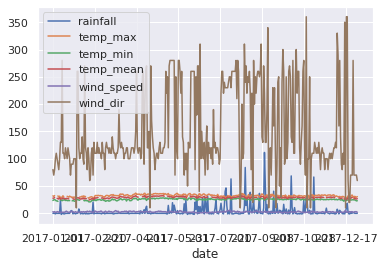

In [ ]:
# Plot Everything
weather_df.plot()

Plotting everything all at once may not be the best course of action. In reality you may encounter a DataFrame with a lot of columns and plotting all the columns in a single graph may result to a messy representation.

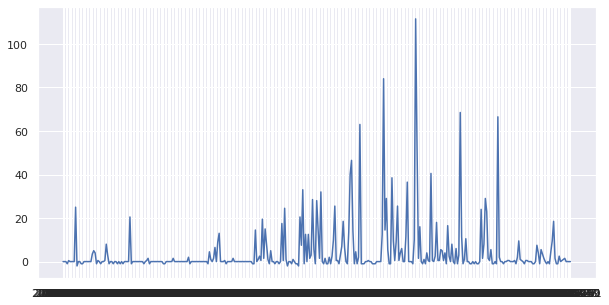

In [ ]:
# Plot the Rainfall column

plt.figure(figsize=(10,5))
plt.plot(weather_df.index, weather_df['rainfall'])
plt.show()

In [ ]:
# Set index to datetime to adjust our visualization and see the xticks better

weather_df = weather_df.set_index(pd.to_datetime(weather_df.index))

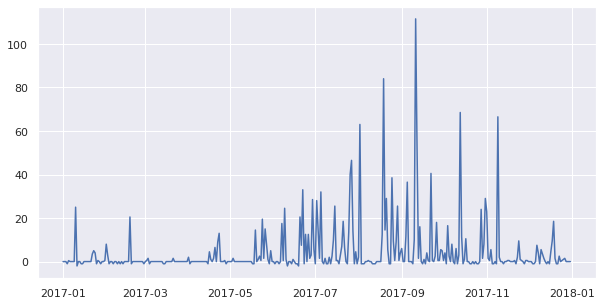

In [ ]:
# Plot the Rainfall column again with our datetime index

plt.figure(figsize=(10,5))
plt.plot(weather_df.index, weather_df['rainfall'])
plt.show()

Three of the columns in our DataFrame describes the temperature namely temp_max, temp_min, and temp_mean. We can display all of this columns together in one graph to visualize the differences between the temperature columns.

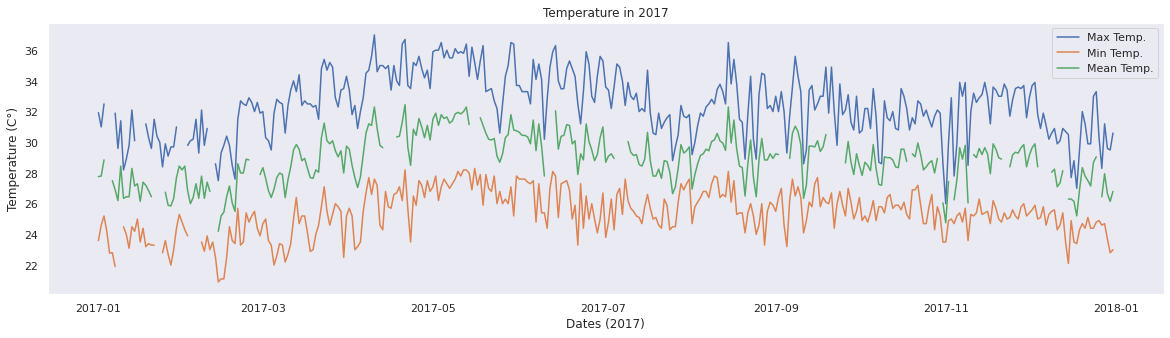

In [ ]:
plt.figure(figsize=(20,5))

plt.plot(weather_df.index, weather_df['temp_max'], label='Max Temp.')
plt.plot(weather_df.index, weather_df['temp_min'], label='Min Temp.')
plt.plot(weather_df.index, weather_df['temp_mean'], label='Mean Temp.')

plt.title('Temperature in 2017')

plt.xlabel('Dates (2017)')
plt.ylabel('Temperature (C°)')

plt.grid()
plt.legend()

plt.show()

As we can see in the graph, there are a lot of missing values represented by the broken lines. There are a lot of reasons why sometimes data becomes missing. 

We can treat missing values in various ways some examples are as follows:
*   Leave it as it is
*   Interpolate the values
*   Use 0 for missing values

For now, let us [interpolate](https://www.analyticsvidhya.com/blog/2021/06/power-of-interpolation-in-python-to-fill-missing-values/#:~:text=I%20nterpolation%20is%20a%20technique%20in%20Python%20used,in%20the%20dataframe%20or%20series%20while%20preprocessing%20data.) the values. Interpolation refers to the technique used to estimate unknown data points between two known data points. 





In [ ]:
weather_df['temp_max'] = weather_df['temp_max'].interpolate()
weather_df['temp_min'] = weather_df['temp_min'].interpolate()
weather_df['temp_mean'] = weather_df['temp_mean'].interpolate()

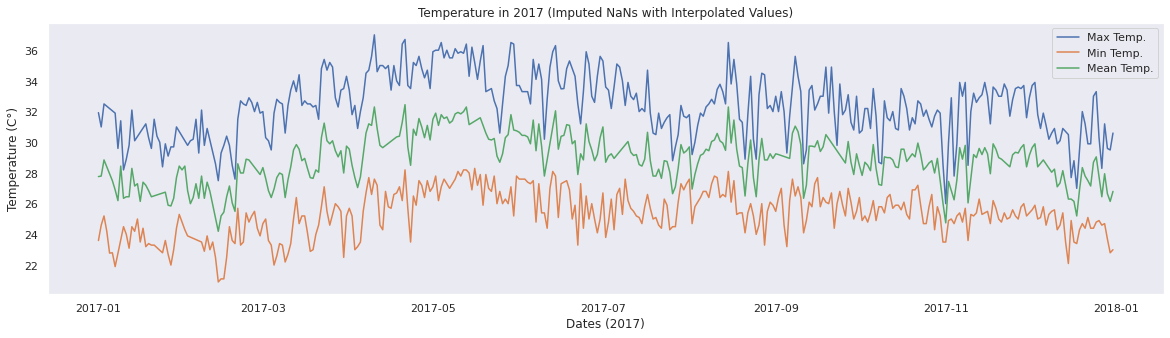

In [ ]:
# Plot the interpolated values

plt.figure(figsize=(20,5))

plt.plot(weather_df.index, weather_df['temp_max'], label='Max Temp.')
plt.plot(weather_df.index, weather_df['temp_min'], label='Min Temp.')
plt.plot(weather_df.index, weather_df['temp_mean'], label='Mean Temp.')

plt.title('Temperature in 2017 (Imputed NaNs with Interpolated Values)')

plt.xlabel('Dates (2017)')
plt.ylabel('Temperature (C°)')

plt.grid()
plt.legend()

plt.show()

Using the interpolation method, we now have successfully estimated the value of the missing values and imputed it in the DataFrame. The interpolated values follows the visual trend of the known values as seen in the graph.

In the graph, we can see that the maximum temperature happened around April, 10, 2017. Moreover, the temperature was hotter during said date until around August of 2017. The temperature then declines unstably until the maximum date of the DataFrame.

## 2 Statistical Analysis
This type of analysis involves investigating trends, patterns, and relationships using quantitative data. It is required to draw valid conclusions in the research process.

In [ ]:
# Use the built-in describe function of Pandas DataFrame to display statistical analysis of the data
weather_df.describe()

,rainfall,temp_max,temp_min,temp_mean,wind_speed,wind_dir
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,4.223014,32.407482,25.346301,28.862673,2.558904,151.397260
std,12.088933,2.057831,1.491483,1.577702,0.886380,77.905046
min,-2.000000,26.000000,20.900000,24.200000,1.000000,10.000000
25%,0.000000,30.900000,24.400000,27.800000,2.000000,100.000000
50%,0.000000,32.500000,25.400000,28.950000,2.000000,120.000000
75%,2.000000,33.700000,26.400000,29.900000,3.000000,230.000000
max,111.500000,37.000000,28.300000,32.450000,6.000000,360.000000


We will use pairplot to represent the pair-wise relationships between all the variables in the DataFrame.

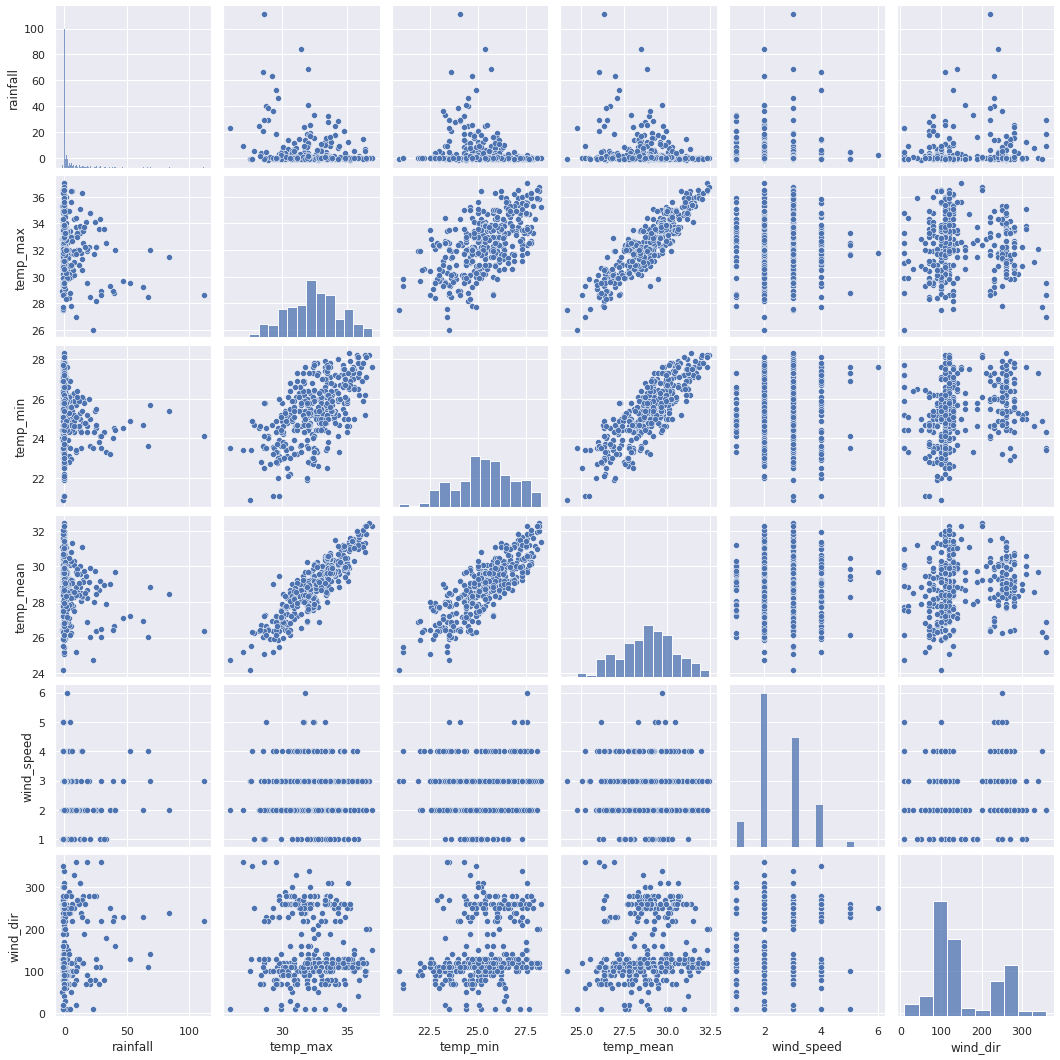

In [ ]:
# Plot pair-wise relationship of the DataFrame
sns.pairplot(weather_df)

The data suggests that there is a linear relationship in some of the variables in our data. This can be seen in the temperature-related columns which is shown in the scatterplot for each column (e.g. *temp_max* increases, then *temp_mean* also increases). 
Looking closely with the wind direction, it splites our data into two. This division significantly affects the temperature columns as seen in the division of data points.